<a href="https://colab.research.google.com/github/BhaswatiRoy/Machine-Learning-Projects/blob/main/Fruit_Name_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#reading the dataset
df=pd.read_csv("Fruit Name.csv")

In [ ]:
#viewing the top 5 rows
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
#number of datapoints(rows) in the dataset
len(df['fruit_label'])

58

In [ ]:
#viewing the number of rows and columns in tuple format
df.shape

(58, 7)

In [ ]:
#creating a dictionary of key as a value(1,2,3,4) reprenting each fruit and value as name(apple,mandarin,orange,lemon)
#unique()=>number of unique entities 
lookup_fruit_name = dict(zip(df.fruit_label.unique(), df.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

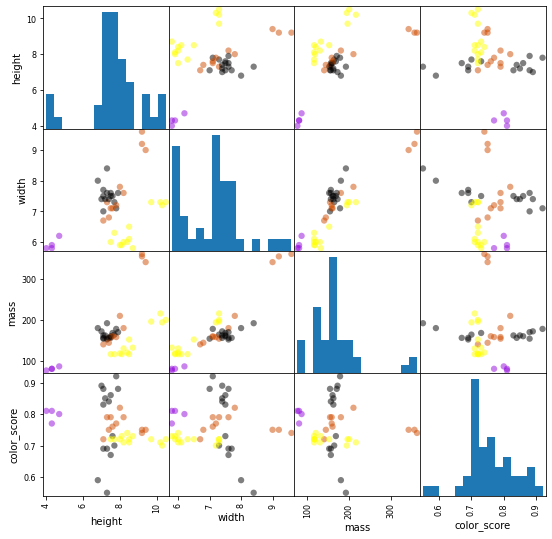

In [ ]:
#plotting scatter matrix=>shows all possible pairs of features and showing scatter plot for each pair
#each point in each scatter plot represents a fruit according to color coding
#diagonals show histograms showing distribution of feature value for that feature
from matplotlib import cm
x = df[['height', 'width', 'mass', 'color_score']]
y = df['fruit_label']
#random_state=>we need to put an integer value so that analysis starts from same point of the dataset everytime
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(x_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

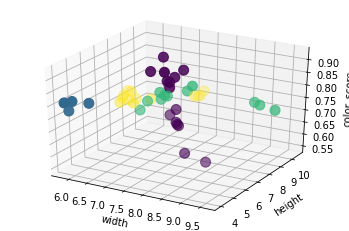

In [ ]:
#plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
#each point represents a fruit according it's color coding 
#mandarin=blue,lemon=yellow,orange=green,apple=purple
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_train['width'], x_train['height'], x_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [ ]:
#creating train test splits
#by feature selection we selected mass,width,height for making prediction
x = df[['mass', 'width', 'height']]
y = df['fruit_label']

#default division is 75%(train)/25%(test) for train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
#importing KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
#fitting the x_train and y_train to the model=>train the classifier/fit the estimator
knn.fit(x_train, y_train)
#deciding nearest neighbours is done by use of Euclidean metrics which is by default rule of scikit-learn
#Euclidean Metrics is just Minkowski Metric with p=2 value

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#estimate the accuracy of the classifier on basis of test data
#score()=>when test dataset is passed as parameters then we get accuracy of the model
knn.score(x_test, y_test)

0.4

In [ ]:
#1st example to check how good our classifier predicts on new and unseen data
#a small fruit with mass 20g,width 4.3 cm,height 5.5 cm
#predict()=>predicts values 
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [ ]:
#2nd example to check how good our classifier predicts on new and unseen data
#a larger,elongated fruit with mass 100g,width 6.3 cm,height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

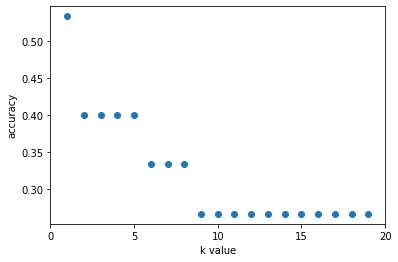

In [ ]:
#measure the sensitivity of accuracy of the KNN Classifier according to choice of value of "k"
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))

#figure shows that larger values of k from 1 to 20 leads to lower accuracy
plt.figure()
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

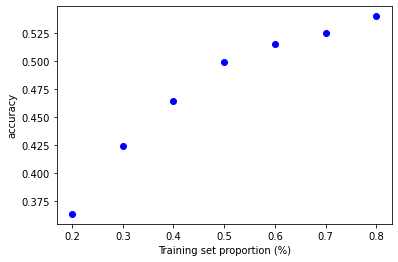

In [ ]:
#measure the sensitivity of accuracy of the KNN Classifier according to train/test split proportion
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:
    scores = []
    for i in range(1,1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1-s)
        knn.fit(x_train, y_train)
        scores.append(knn.score(x_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');